<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/possum_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

The goal of this notebook is to create a neural network to estimate the continuous value of our target label(`totlngth`) against a regular linear regression model (OLS)

In [246]:
# Imports
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [247]:
df = pd.read_csv('/content/drive/MyDrive/deep-learning/possum/possum.csv')
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


# Explore data

In [248]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


We will use `totlngth` as our target label since it has the hightest std. All other variables are around the same value so this label will give our model more of a chance to get values wrong

In [249]:
df.isnull().sum()


case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

looks like `age` and `sex` have missing values. 

In [250]:
# Split data into categorical and numerical list
categorical = [x for x in df.columns if df[x].dtype == 'O']
numerical = [x for x in df.columns if df[x].dtype != 'O']


### Lets check for outliers using IQR

In [251]:


for(i, x) in enumerate(numerical):
  IQR = df[x].quantile(0.75) - df[x].quantile(0.25)
  Lower_fence = df[x].quantile(0.25) - (IQR * 3)
  Upper_fence = df[x].quantile(0.75) + (IQR * 3)
  print('min', df[x].min(), 'max', df[x].max())
  print('{name} outliers are values < {lowerboundary} or > {upperboundary} \n'.format(
  name=x, lowerboundary=Lower_fence, upperboundary=Upper_fence))




min 1 max 104
case outliers are values < -127.75 or > 232.75 

min 1 max 7
site outliers are values < -14.0 or > 21.0 

min 1.0 max 9.0
age outliers are values < -6.0 or > 13.25 

min 82.5 max 103.1
hdlngth outliers are values < 78.525 or > 106.87499999999999 

min 50.0 max 68.6
skullw outliers are values < 45.6 or > 67.475 

min 75.0 max 96.5
totlngth outliers are values < 66.0 or > 108.0 

min 32.0 max 43.0
taill outliers are values < 29.5 or > 44.375 

min 60.3 max 77.9
footlgth outliers are values < 40.89999999999998 or > 96.20000000000002 

min 40.3 max 56.2
earconch outliers are values < 23.19999999999999 or > 73.60000000000001 

min 12.8 max 17.8
eye outliers are values < 10.425000000000002 or > 19.699999999999996 

min 22.0 max 32.0
chest outliers are values < 18.0 or > 35.5 

min 25.0 max 40.0
belly outliers are values < 21.625 or > 43.5 



Running and IQR test on the numerical data shows us that the only significant outlier is `skullw`, but not by much.

### Let's validate outliers by visuzaling numerical data

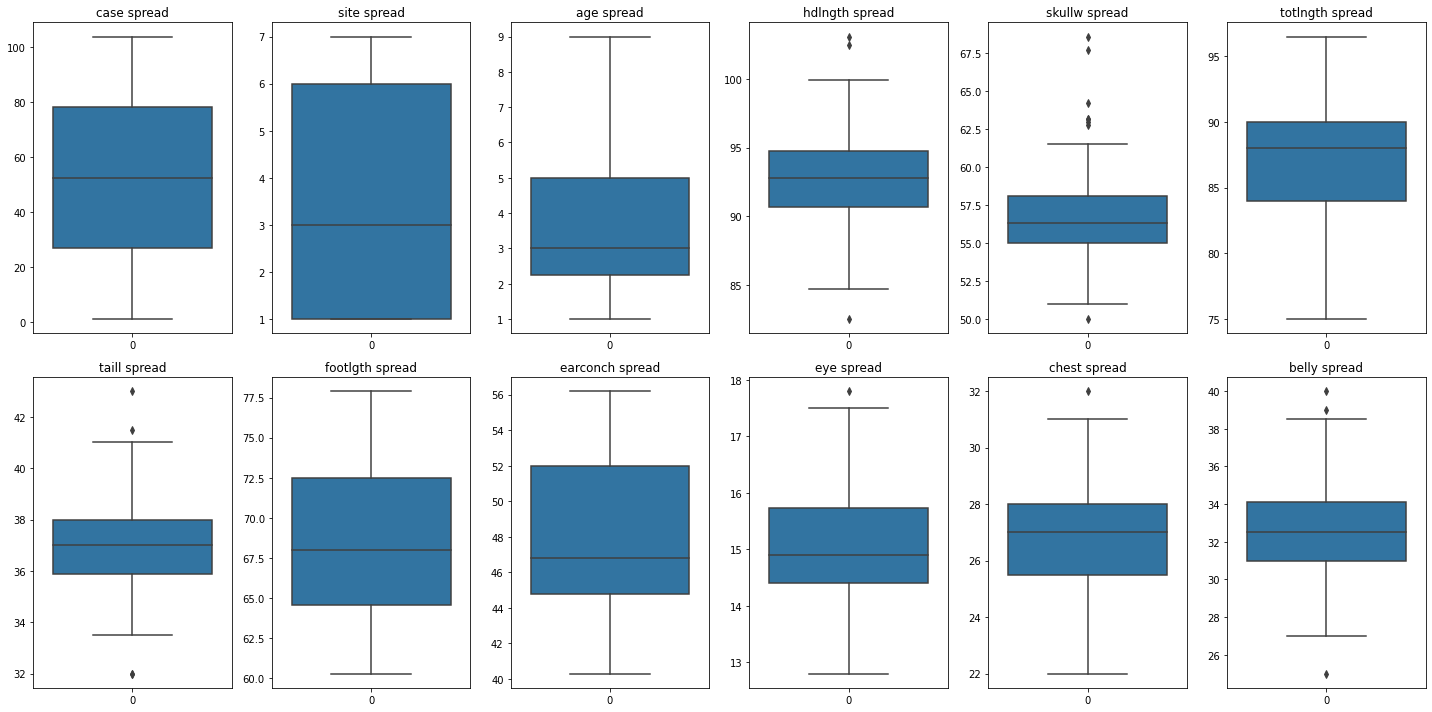

In [252]:
plt.figure(figsize=(20, 10))

for (i, x) in enumerate(numerical):
  plt.subplot(2, 6, i + 1)
  sns.boxplot(data=df[x] )
  plt.title(f'{x} spread')

plt.tight_layout()

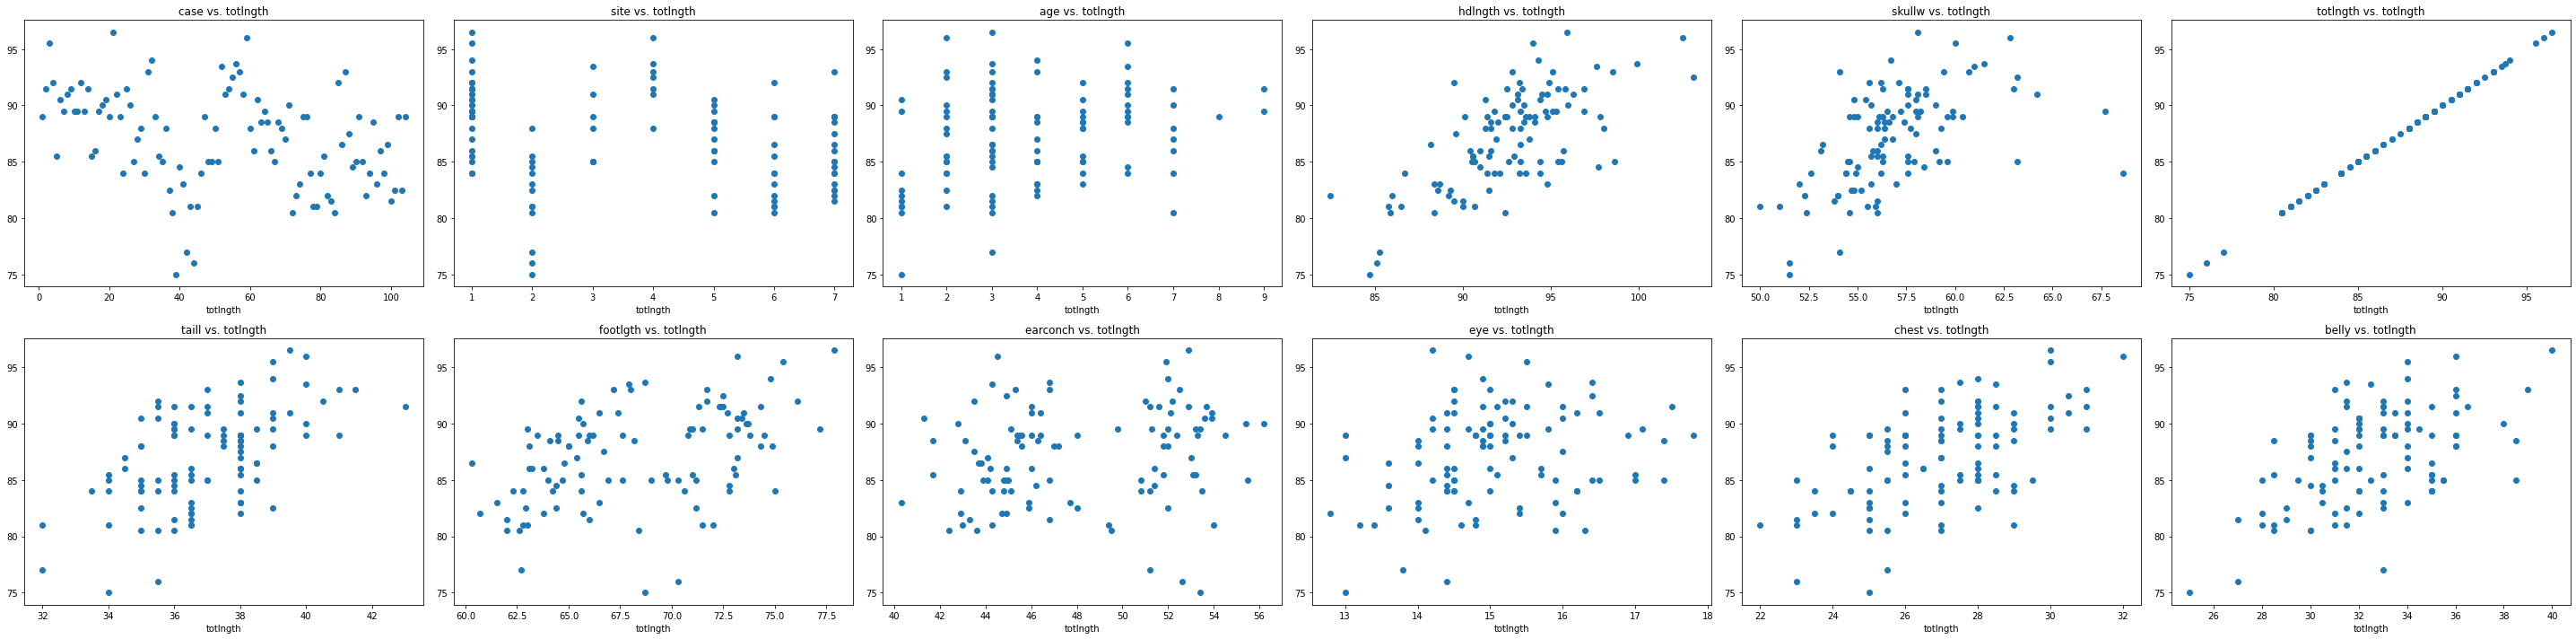

In [253]:
plt.figure(figsize=(40, 10))

for (i, x) in enumerate(numerical):
  plt.subplot(2, 6, i + 1)
  plt.scatter(x = df[x], y=df['totlngth'] )
  plt.title(f'{x} vs. totlngth')
  plt.xlabel(x)
  plt.xlabel('totlngth')

plt.tight_layout()



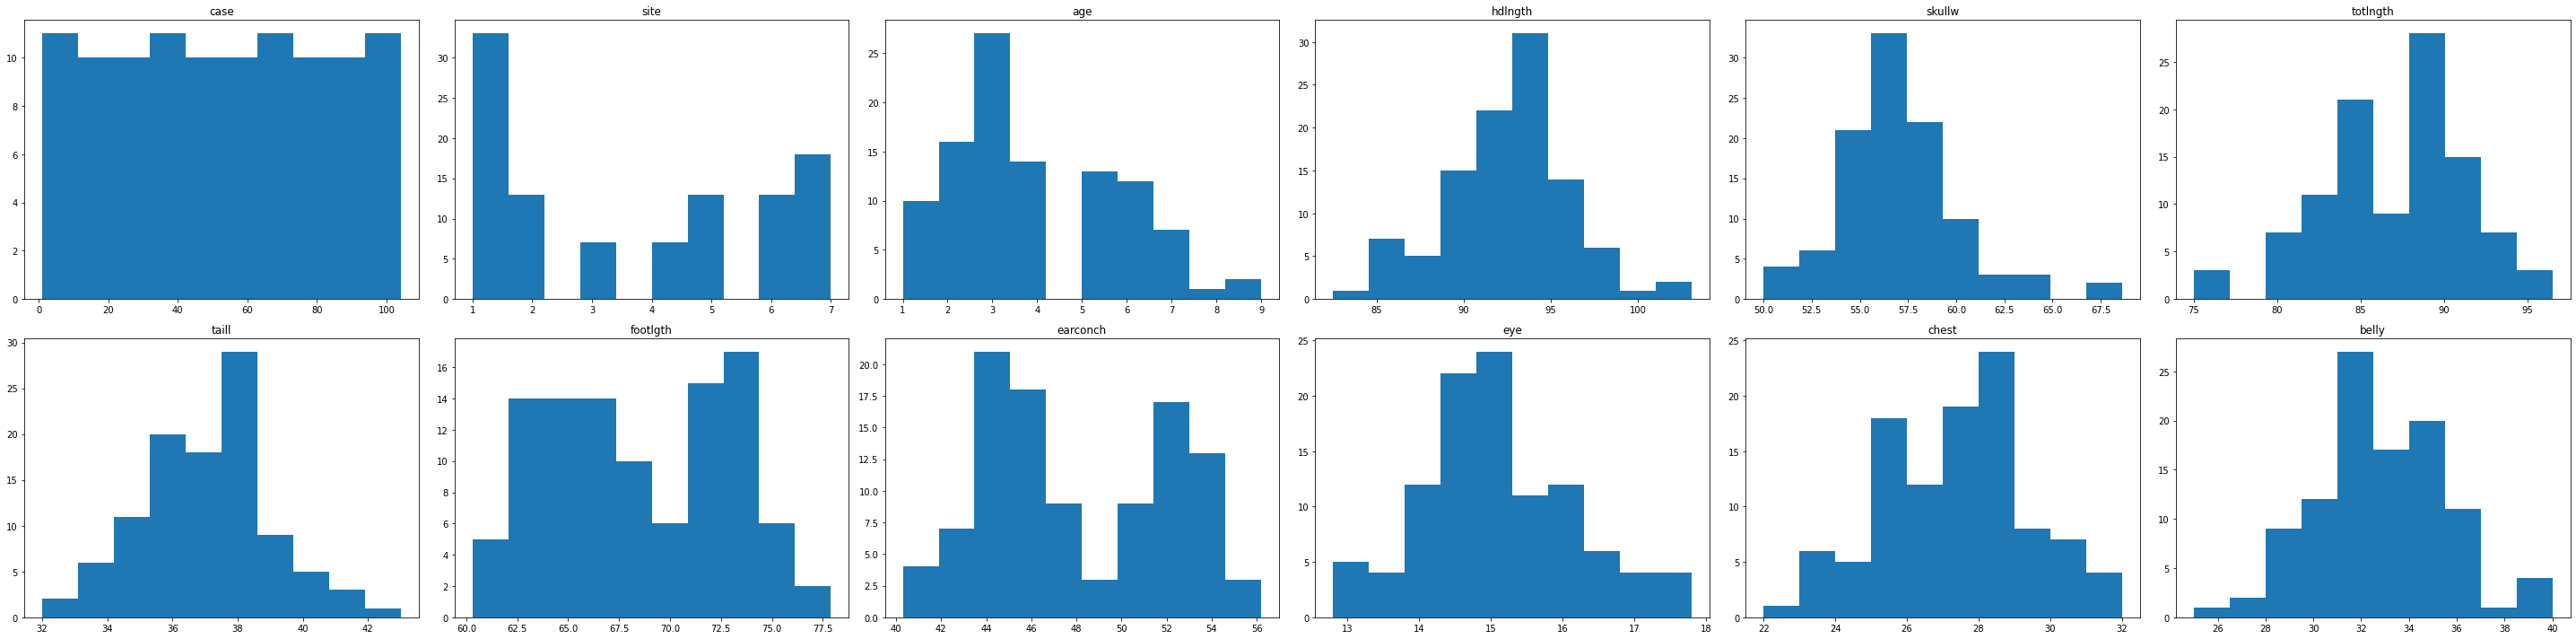

In [254]:
plt.figure(figsize=(40, 10))

for (i, x) in enumerate(numerical):
  plt.subplot(2, 6, i + 1)
  plt.hist(df[x])
  plt.title(f'{x}')

plt.tight_layout()

The visual representation of our model shows us that our IQR assesment holds up. The only significant outlier is `skullw`

**Summary:**
 there does not seem to be a lot of corr between our target label and features

### Visualize categorical data

In [255]:
print(f'{df.Pop.value_counts()} \n')
print(df.sex.value_counts())

other    58
Vic      46
Name: Pop, dtype: int64 

m    61
f    43
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


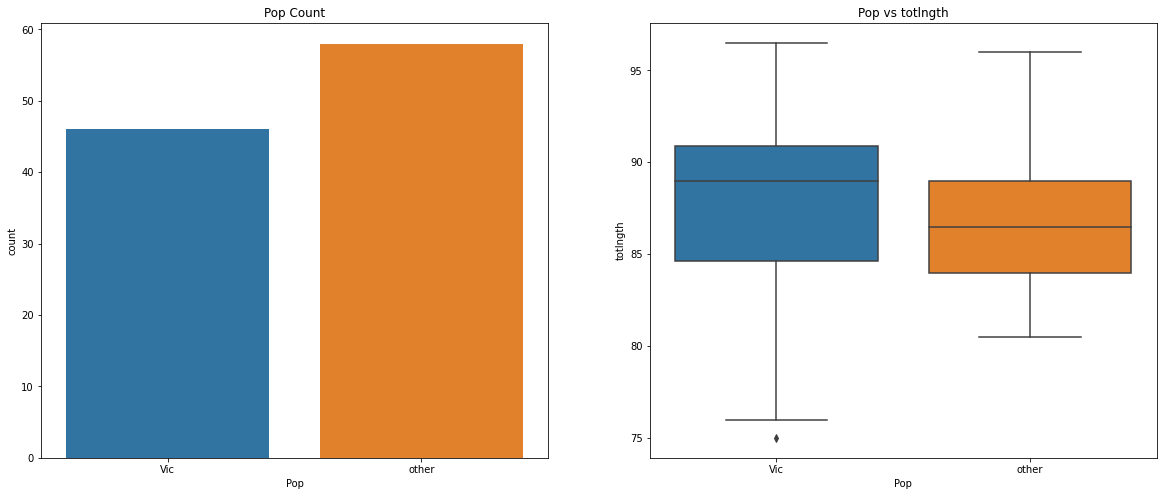

In [256]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title('Pop Count')
sns.countplot(df.Pop)

plt.subplot(1, 2, 2)
plt.title('Pop vs totlngth')
sns.boxplot(x = df.Pop, y = df.totlngth)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


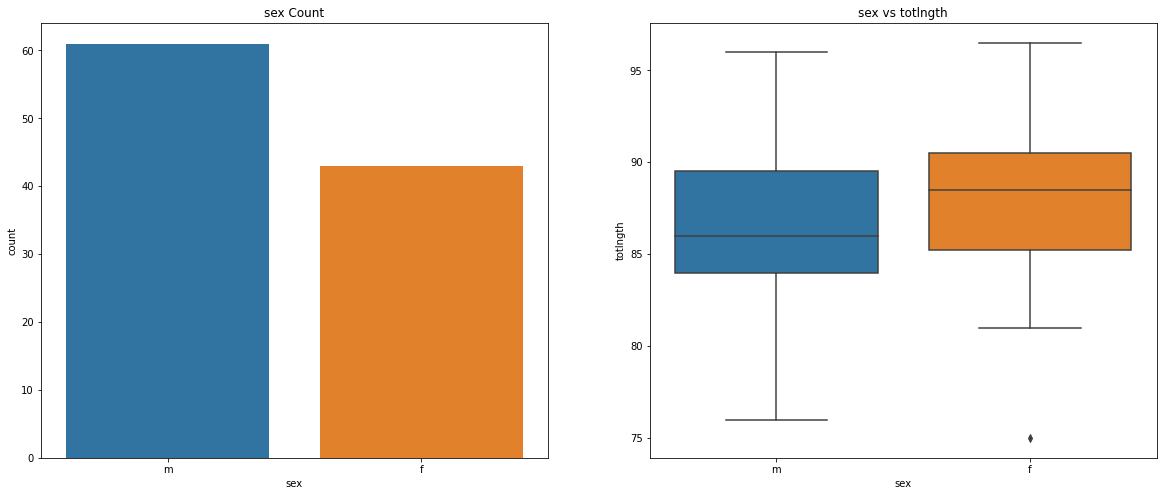

In [257]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title('sex Count')
sns.countplot(df.sex)

plt.subplot(1, 2, 2)
plt.title('sex vs totlngth')
sns.boxplot(x=df.sex, y=df.totlngth)

**summary:** although the data doesn't vary too much, there are some clear differences in `totlngth` depending on `sex` and `Pop`




# Clean up data

* Remove `case` since we don't need it and is of no significance.

* for missing values we can replace them with the mean of the column set. We are using mean because there are no significant outliers, otherwise we would use the median

* since `skullw` is our only significant outlier we can cap off its max values by the max value provided by our IQR assesment.

* one hot encode categorical values



In [258]:
# Remove `case` since we don't need it and is of no significance.
df_1 = df.drop(['case'], axis=1)
df_1

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [259]:
# Interpolate mean into missing values

age_mean = df['age'].mean()
footlgth_mean = df['footlgth'].mean()

df_1['age'].fillna(value=age_mean, inplace=True)
df_1['footlgth'].fillna(value=footlgth_mean, inplace=True)

df_1.isnull().sum()

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [260]:
def max_value(df2, variable, top):
    return np.where(df2[variable] > top, top, df2[variable])


In [261]:
# Let's cap `skullw` with max IQR of 67.475


def max_value(df, variable, top):
  return np.where(df[variable] > top, top, df[variable])

df_1['skullw'] = max_value(df_1, 'skullw', 67.475)




In [262]:
df_1.skullw.describe() , df.skullw.describe()

(count    104.000000
 mean      56.870673
 std        3.066404
 min       50.000000
 25%       54.975000
 50%       56.350000
 75%       58.100000
 max       67.475000
 Name: skullw, dtype: float64, count    104.000000
 mean      56.883654
 std        3.113426
 min       50.000000
 25%       54.975000
 50%       56.350000
 75%       58.100000
 max       68.600000
 Name: skullw, dtype: float64)

In [263]:

# Let's rerun IQR assesment to check for outliers
numerical_1 = [x for x in df_1.columns if df_1[x].dtype != 'O']

for(i, x) in enumerate(numerical_1):
  IQR = df_1[x].quantile(0.75) - df_1[x].quantile(0.25)
  Lower_fence = df_1[x].quantile(0.25) - (IQR * 3)
  Upper_fence = df_1[x].quantile(0.75) + (IQR * 3)
  print('min', df_1[x].min(), 'max', df_1[x].max())
  print('{name} outliers are values < {lowerboundary} or > {upperboundary} \n'.format(
  name=x, lowerboundary=Lower_fence, upperboundary=Upper_fence))



min 1 max 7
site outliers are values < -14.0 or > 21.0 

min 1.0 max 9.0
age outliers are values < -4.0 or > 11.75 

min 82.5 max 103.1
hdlngth outliers are values < 78.525 or > 106.87499999999999 

min 50.0 max 67.475
skullw outliers are values < 45.6 or > 67.475 

min 75.0 max 96.5
totlngth outliers are values < 66.0 or > 108.0 

min 32.0 max 43.0
taill outliers are values < 29.5 or > 44.375 

min 60.3 max 77.9
footlgth outliers are values < 41.10000000000002 or > 96.04999999999998 

min 40.3 max 56.2
earconch outliers are values < 23.19999999999999 or > 73.60000000000001 

min 12.8 max 17.8
eye outliers are values < 10.425000000000002 or > 19.699999999999996 

min 22.0 max 32.0
chest outliers are values < 18.0 or > 35.5 

min 25.0 max 40.0
belly outliers are values < 21.625 or > 43.5 



In [264]:
# One hot encode df_1
# df_1 = pd.get_dummies(df_1)
# df_1

# Create X & y 

* OneHotEncode categorical data
* normalize data
* split and shuffle


In [265]:
df_1.columns

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [266]:
numerical_1.remove('totlngth')

ct = make_column_transformer(
    (MinMaxScaler(), numerical_1),
    (OneHotEncoder(handle_unknown='ignore'), categorical)
)

X = df_1.drop('totlngth', axis=1)
y = df_1.totlngth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



# Create and explore different models

### Model_1

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 87.4257 - mae: 87.4257
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 87.3017 - mae: 87.3017
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 87.1775 - mae: 87.1775
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 87.0529 - mae: 87.0529
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 86.9284 - mae: 86.9284
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 86.8038 - mae: 86.8038
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 86.6798 - mae: 86.6798
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 86.5557 - mae: 86.5557
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 86.4313 - mae: 86.4313
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 86.3073 - mae: 86.3073
Epoch 11/100
3/3 [==============================] - 0s 8ms/

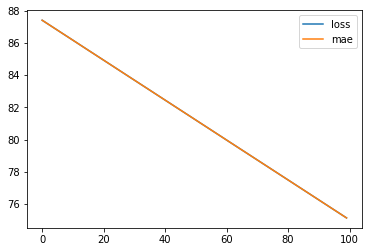

In [272]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics='mae')


history_1 = model_1.fit(X_train_normal, y_train, epochs=100, verbose=False)
pd.DataFrame(history_1.history).plot()
print('evaluation:', model_1.evaluate(X_test_normal, y_test))

> using **model_1** as our base model has a very high mae compared to our y_test data


### model_2

lets try running it for longer

Epoch 1/500
3/3 [==============================] - 1s 5ms/step - loss: 87.4257 - mae: 87.4257
Epoch 2/500
3/3 [==============================] - 0s 8ms/step - loss: 87.3017 - mae: 87.3017
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 87.1775 - mae: 87.1775
Epoch 4/500
3/3 [==============================] - 0s 5ms/step - loss: 87.0529 - mae: 87.0529
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 86.9284 - mae: 86.9284
Epoch 6/500
3/3 [==============================] - 0s 4ms/step - loss: 86.8038 - mae: 86.8038
Epoch 7/500
3/3 [==============================] - 0s 4ms/step - loss: 86.6798 - mae: 86.6798
Epoch 8/500
3/3 [==============================] - 0s 6ms/step - loss: 86.5557 - mae: 86.5557
Epoch 9/500
3/3 [==============================] - 0s 6ms/step - loss: 86.4313 - mae: 86.4313
Epoch 10/500
3/3 [==============================] - 0s 6ms/step - loss: 86.3073 - mae: 86.3073
Epoch 11/500
3/3 [==============================] - 0s 6ms/

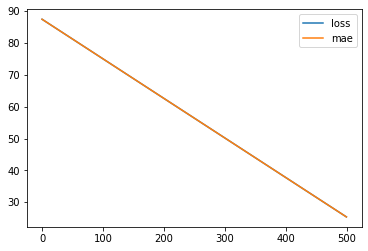

In [275]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics='mae')


history_2 = model_2.fit(X_train_normal, y_train, epochs=500, verbose=True)
pd.DataFrame(history_2.history).plot()
print('evaluation:', model_2.evaluate(X_test_normal, y_test))

By letting the model have more chances to look at our data, we have drastically dropped our mae

### model_3

let's add more layers

1/1 [==============================] - 0s 108ms/step - loss: 1.9224 - mae: 1.9224
evaluation: [1.9224308729171753, 1.9224308729171753]


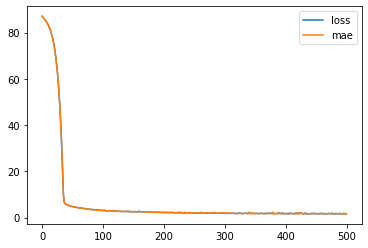

In [281]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics='mae')


history_3 = model_3.fit(X_train_normal, y_train, epochs=500, verbose=False)
pd.DataFrame(history_3.history).plot()
print('evaluation:', model_3.evaluate(X_test_normal, y_test))

By adding a hidden layer with 10 neurons we significantly dropped our mae to 1.92

### model_4

let's play with the learning rate and epochs

1/1 [==============================] - 0s 99ms/step - loss: 1.8010 - mae: 1.8010
evaluation: [1.8010181188583374, 1.8010181188583374]


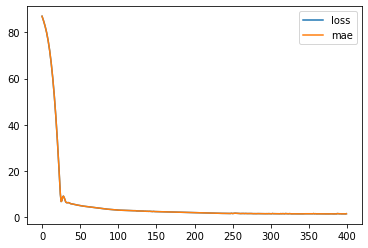

In [319]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics='mae')


history_4 = model_4.fit(X_train_normal, y_train, epochs=400, verbose=False)
pd.DataFrame(history_4.history).plot()
print('evaluation:', model_4.evaluate(X_test_normal, y_test))

Changing the optimzer, learning_rate and epochs, we are gettting slightly better results than model_3

# Compare Models

In [321]:
# Create helper functions for evaluation
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

In [323]:
models = [
          ['model_1', mae(y_test, model_1.predict(X_test_normal)).numpy(), mse(y_test, model_1.predict(X_test_normal)).numpy()],
          ['model_2', mae(y_test, model_2.predict(X_test_normal)).numpy(), mse(y_test, model_2.predict(X_test_normal)).numpy()],
          ['model_3', mae(y_test, model_3.predict(X_test_normal)).numpy(), mse(y_test, model_3.predict(X_test_normal)).numpy()],
          ['model_4', mae(y_test, model_4.predict(X_test_normal)).numpy(), mse(y_test, model_4.predict(X_test_normal)).numpy()],
]

pd.DataFrame(models, columns=['Name', 'MAE', 'MSE'])

,Name,MAE,MSE
0,model_1,74.632767,5581.410156
1,model_2,23.934835,619.759460
2,model_3,1.922431,7.822470
3,model_4,1.801020,7.010679


In [324]:
y_test.describe()

count    21.000000
mean     86.952381
std       3.409196
min      81.000000
25%      85.000000
50%      85.500000
75%      89.500000
max      94.000000
Name: totlngth, dtype: float64

# Summary

model_4 was our best perfoming model with the lowest mae and mse

In [328]:
model_4.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                150       
                                                                 
 dense_52 (Dense)            (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
